In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import acquire as aq
import prepare as ppr

In [3]:
tdf = ppr.prep_telco(aq.get_telco_data())

In [4]:
tdf = tdf[['monthly_charges','streaming_services','online_security_backup','household_type_id','tenure','churn_encode']]

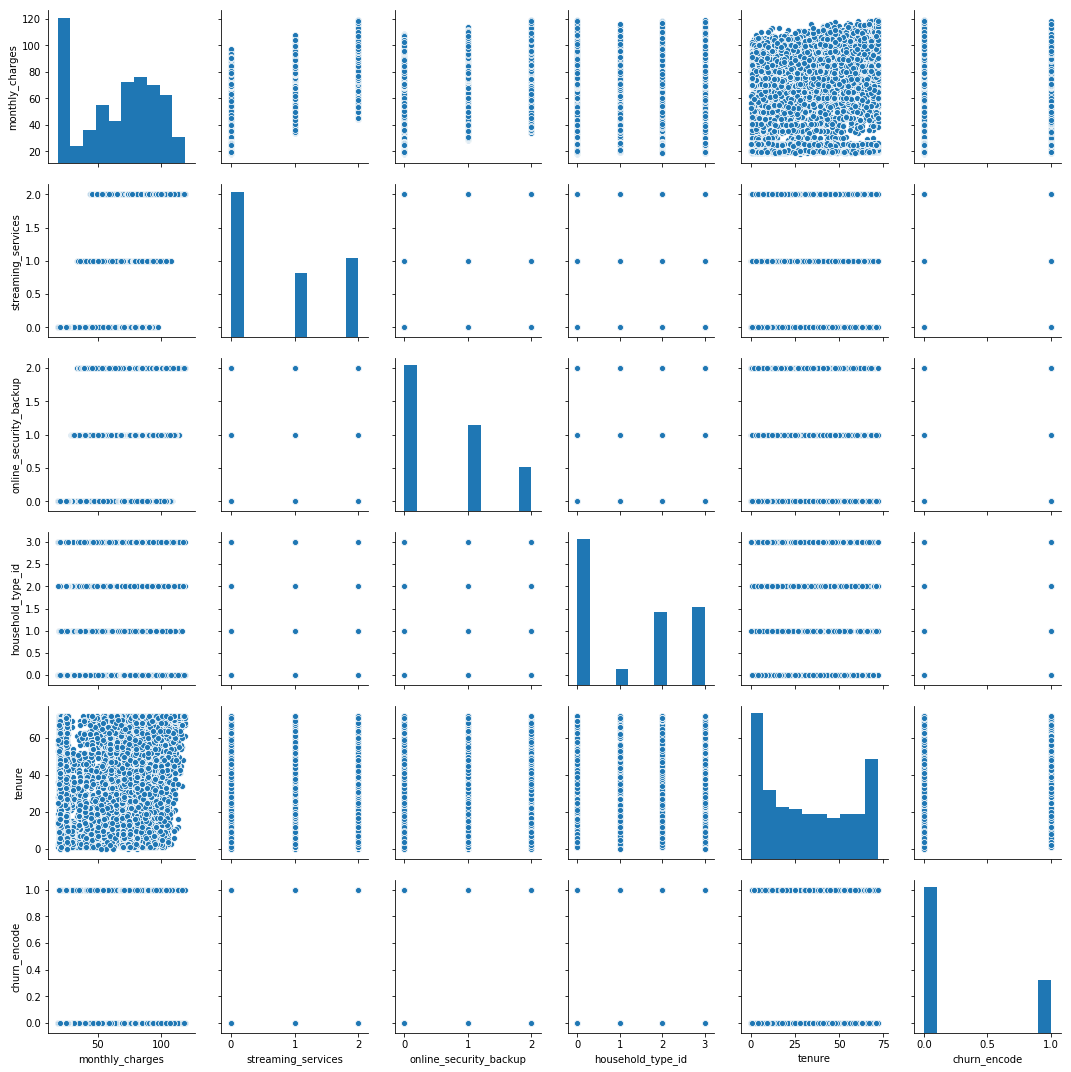

In [5]:
sns.pairplot(tdf)

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


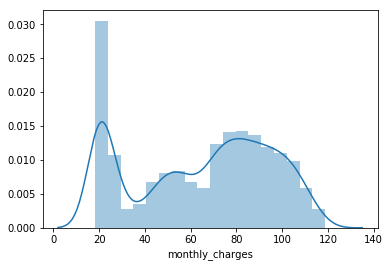

In [6]:
sns.distplot(tdf['monthly_charges'])

In [7]:
tdfc = tdf[tdf['churn_encode'] == 1]

In [8]:
tdfs = tdf[tdf['churn_encode'] == 0]

([array([1123.,    0.,    0.,   77.,    0.,    0.,  420.,    0.,    0.,
          249.]),
  array([2157.,    0.,    0.,  284.,    0.,    0., 1233.,    0.,    0.,
         1500.])],
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 2 Lists of Patches objects>)

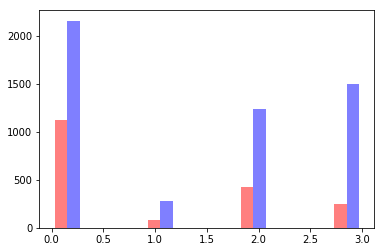

In [21]:
import seaborn as sns
dfs = [tdfc['household_type_id'],tdfs['household_type_id']]
plt.hist(dfs, color=['r','b'], alpha=0.5)

In [32]:
tdfc.groupby('household_type_id').count()

,monthly_charges,streaming_services,online_security_backup,tenure,churn_encode
household_type_id,,,,,
0,1123,1123,1123,1123,1123
1,77,77,77,77,77
2,420,420,420,420,420
3,249,249,249,249,249


In [45]:
hhids = []
hhids.append((tdfs.groupby('household_type_id')['churn_encode'].count()).iloc[0])
hhids.append((tdfs.groupby('household_type_id')['churn_encode'].count()).iloc[1])
hhids.append((tdfs.groupby('household_type_id')['churn_encode'].count()).iloc[2])
hhids.append((tdfs.groupby('household_type_id')['churn_encode'].count()).iloc[3])

In [46]:
hhidc = []
hhidc.append((tdfc.groupby('household_type_id')['churn_encode'].count()).iloc[0])
hhidc.append((tdfc.groupby('household_type_id')['churn_encode'].count()).iloc[1])
hhidc.append((tdfc.groupby('household_type_id')['churn_encode'].count()).iloc[2])
hhidc.append((tdfc.groupby('household_type_id')['churn_encode'].count()).iloc[3])

In [47]:
hhidc

[1123, 77, 420, 249]

In [48]:
hhids

[2157, 284, 1233, 1500]

In [57]:
hhidcp=[]
for i in range(len(hhidc)):
    hhidcp.append((hhidc[i]/(hhidc[i]+hhids[i]))*100)

In [58]:
hhidcp

[34.237804878048784, 21.329639889196674, 25.40834845735027, 14.236706689536879]

In [ ]:
household_id_churn_percentages = {}
for i in hhidcp:
    household_id_churn_percentages[]